In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_tracks = pd.read_csv('tracks.csv')

In [4]:
def load_jsonl(path):
    with open(path, 'r', encoding='utf-8') as infile:
        for line in infile:
            yield json.loads(line.strip())

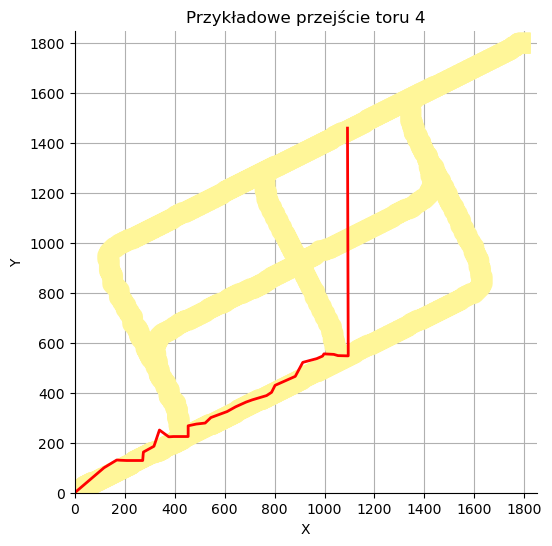

In [23]:
track_id = 4

input_path = f"../filtered_data/filtered_records_{track_id}_metrics.jsonl"

plt.figure(figsize=(8,6))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

ax.set_xlim(0, 1850)
ax.set_ylim(0, 1850)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

track_types = len(df_tracks[df_tracks['track_id'] == track_id]['track_type'].unique().tolist())
for j in range(track_types):
    temp = df_tracks[(df_tracks['track_id'] == track_id) & (df_tracks['track_type'] == j + 1)]
    ax.plot(temp['x'], temp['y'], linewidth=15, alpha=1, color='#FFF699')

ax.set_xticks([i for i in range(0, 1801, 200)])
ax.set_yticks([i for i in range(0, 1801, 200)])

plt.xlabel("X")
plt.ylabel("Y")

gen = load_jsonl(input_path)

for record in gen:
    if record.get('Completed', False):
        track = record.get('Points', {})

        if isinstance(track, dict) and '__pd_dataframe__' in track:
            columns = track['columns']
            data = track['data']

            df = pd.DataFrame(data, columns=columns)

            if 'X' in df.columns and 'Y' in df.columns:
                plt.plot(df['X'], df['Y'], linestyle='-', color='r', linewidth=2)
                plt.title(f"Przykładowe przejście toru {track_id}")
                plt.grid(True)
                plt.show()
                break


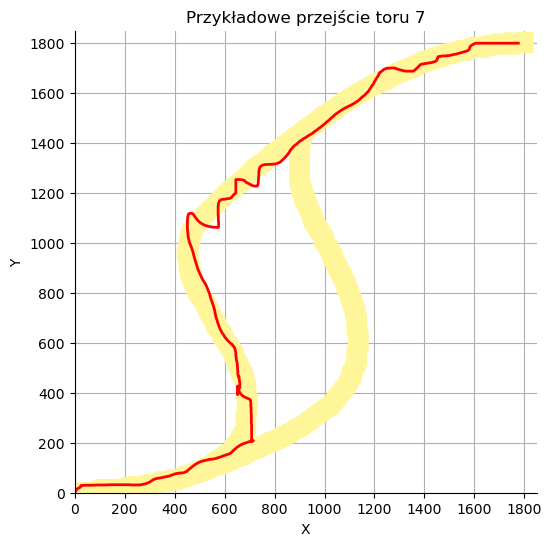

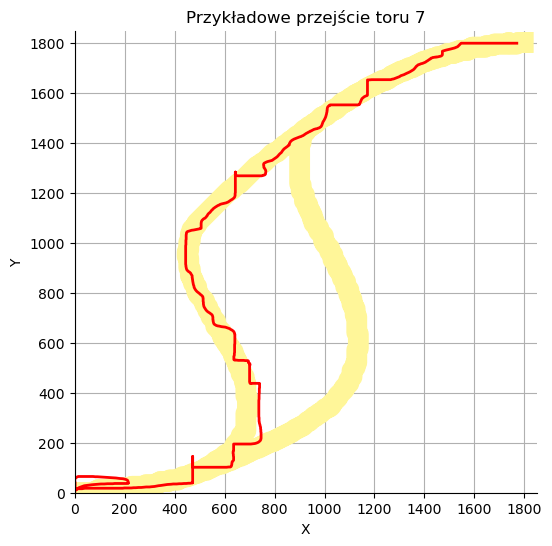

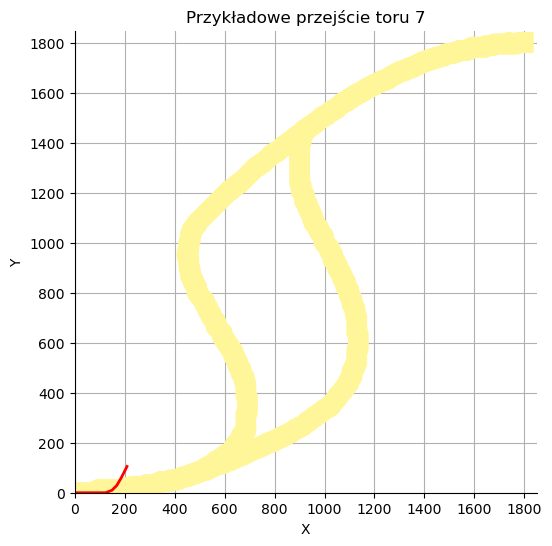

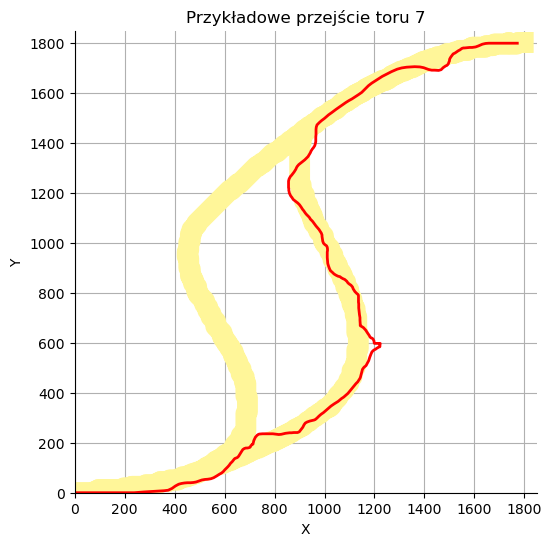

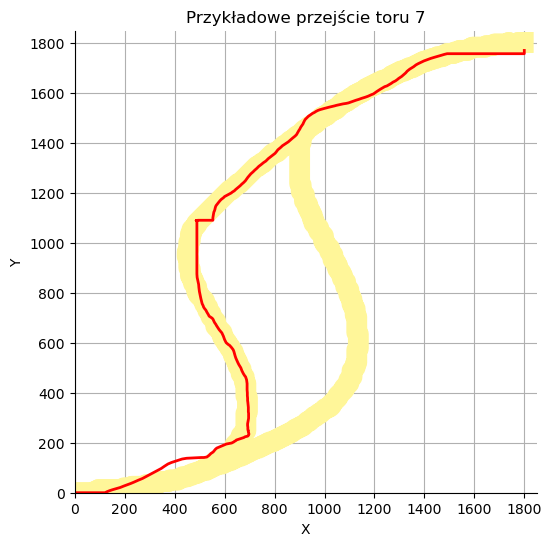

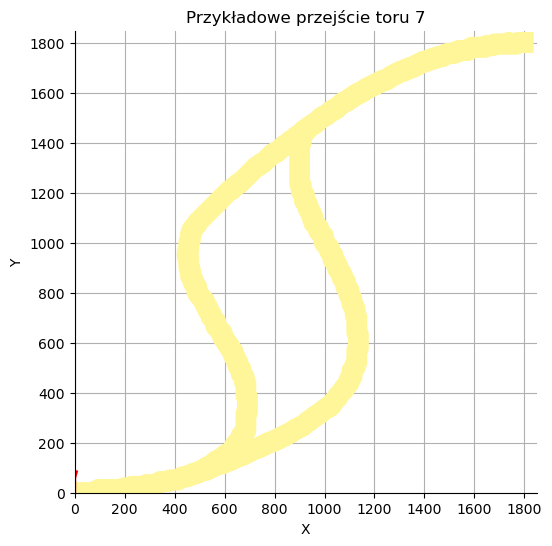

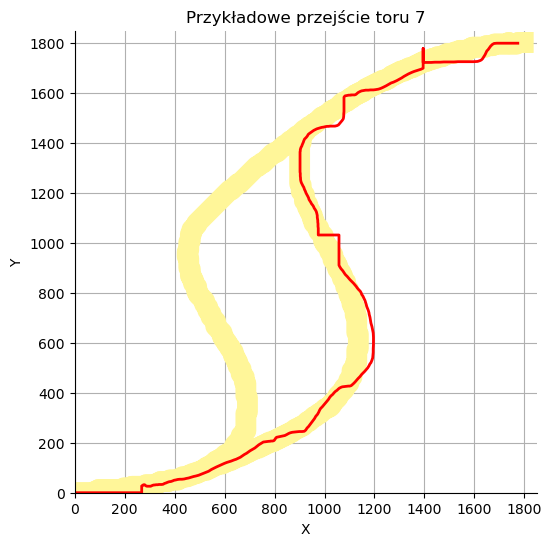

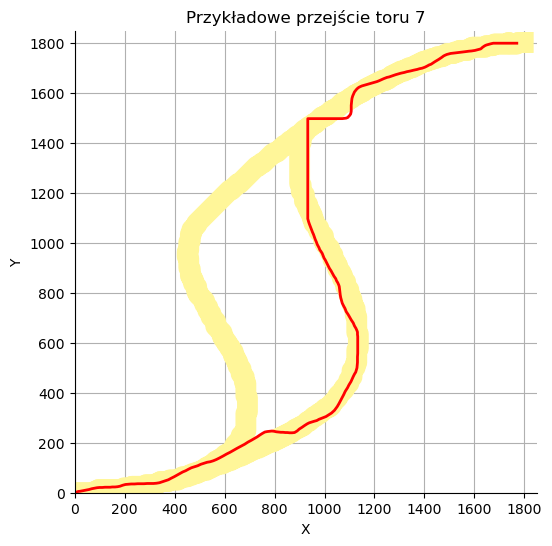

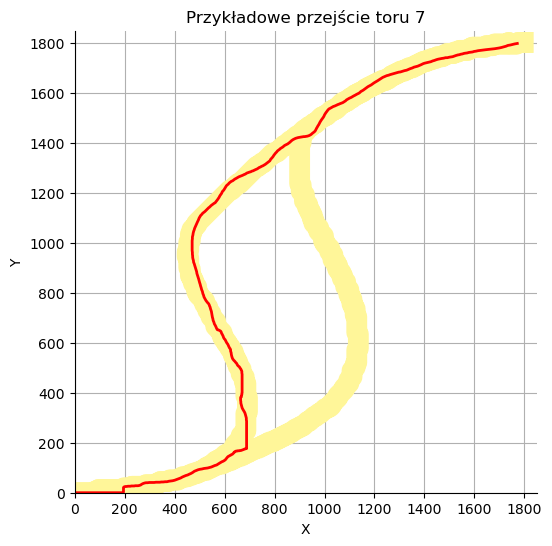

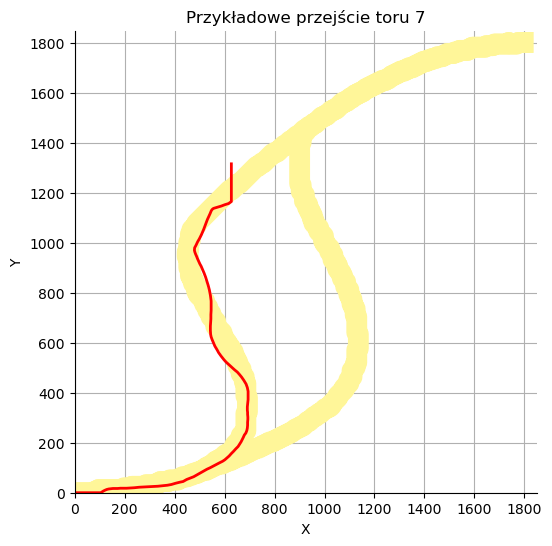

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

track_id = 7
input_path = f"../filtered_data/filtered_records_{track_id}_metrics.jsonl"

gen = load_jsonl(input_path)

count = 0
max_plots = 10

for record in gen:
    if (
        record.get('Completed', False)
        and record.get('track_Difficulty_Level', -1) == 0  # filtr trudności
    ):
        track = record.get('Points', {})

        if isinstance(track, dict) and '__pd_dataframe__' in track:
            columns = track['columns']
            data = track['data']

            df = pd.DataFrame(data, columns=columns)

            if 'X' in df.columns and 'Y' in df.columns:
                # === Rysowanie ===
                plt.figure(figsize=(8, 6))
                ax = plt.gca()
                ax.set_aspect('equal', adjustable='box')

                ax.set_xlim(0, 1850)
                ax.set_ylim(0, 1850)
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)

                # Rysowanie toru
                track_types = len(df_tracks[df_tracks['track_id'] == track_id]['track_type'].unique().tolist())
                for j in range(track_types):
                    temp = df_tracks[(df_tracks['track_id'] == track_id) & (df_tracks['track_type'] == j + 1)]
                    ax.plot(temp['x'], temp['y'], linewidth=15, alpha=1, color='#FFF699')

                # Oś
                ax.set_xticks([i for i in range(0, 1801, 200)])
                ax.set_yticks([i for i in range(0, 1801, 200)])

                # Tytuł i etykiety
                plt.xlabel("X")
                plt.ylabel("Y")
                plt.title(f"Przykładowe przejście toru {track_id}")

                # Rysowanie trasy gracza
                plt.plot(df['X'], df['Y'], linestyle='-', color='r', linewidth=2)

                plt.grid(True)
                plt.show()

                count += 1
                if count >= max_plots:
                    break
